# BARPLOT & PIE CHART

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.select_dtypes(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [6]:
df['gender'].value_counts(normalize=True)
#normalize itu untuk 

female    0.518
male      0.482
Name: gender, dtype: float64

In [7]:
df['race/ethnicity'].value_counts(normalize=True)

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64

In [8]:
df['parental level of education'].value_counts(normalize=True)

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64

In [9]:
df['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [10]:
df['test preparation course'].value_counts(normalize=True)

none         0.642
completed    0.358
Name: test preparation course, dtype: float64

In [11]:
def summary(df):
    dtype =[]
    unique = []
    ratio = []
    
    for i in df.columns:
        dtype.append(df[i].dtype)
        val_counts = df[i].value_counts(normalize=True)
        unique.append(val_counts.index)
        ratio.append(val_counts.values)
        
    summary_df = pd.DataFrame({'dtype': dtype, 'unique':unique, 'ratio' : ratio}, index=df.columns)
    return display(summary_df)

In [12]:
summary(df)

,dtype,unique,ratio
gender,object,"Index(['female', 'male'], dtype='object')","[0.518, 0.482]"
race/ethnicity,object,"Index(['group C', 'group D', 'group B', 'group...","[0.319, 0.262, 0.19, 0.14, 0.089]"
parental level of education,object,"Index(['some college', 'associate's degree', '...","[0.226, 0.222, 0.196, 0.179, 0.118, 0.059]"
lunch,object,"Index(['standard', 'free/reduced'], dtype='obj...","[0.645, 0.355]"
test preparation course,object,"Index(['none', 'completed'], dtype='object')","[0.642, 0.358]"
math score,int64,"Int64Index([ 65, 62, 59, 69, 73, 61, 67,...","[0.036, 0.035, 0.032, 0.032, 0.027, 0.027, 0.0..."
reading score,int64,"Int64Index([ 72, 74, 64, 73, 67, 58, 66,...","[0.034, 0.033, 0.032, 0.03, 0.03, 0.028, 0.027..."
writing score,int64,"Int64Index([ 74, 70, 68, 73, 62, 80, 72,...","[0.035, 0.033, 0.031, 0.028, 0.027, 0.027, 0.0..."


## __BARPLOT__

In [13]:
df_by_gender = df.groupby('gender').mean()
df_by_gender

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


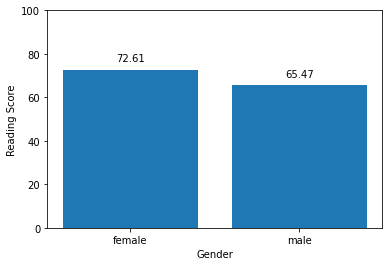

In [25]:
plt.bar(df_by_gender.index, df_by_gender['reading score'])
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.ylim(0,100)
plt.annotate(f'{round(df_by_gender.iloc[0,1], 2)}', 
             xy=('female', df_by_gender.loc['female','reading score']+3), ha='center', va='bottom')
plt.annotate(f'{round(df_by_gender.iloc[1,1], 2)}', 
             xy=('male', df_by_gender.loc['male','reading score']+3), ha='center', va='bottom')
plt.show()

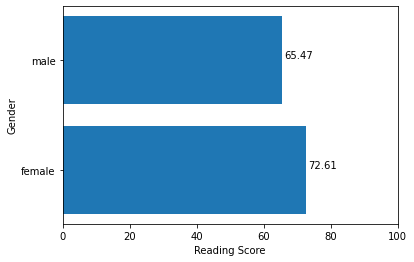

In [15]:
plt.barh(df_by_gender.index, df_by_gender['reading score'])
plt.xlabel('Reading Score')
plt.ylabel('Gender')
plt.xlim(0,100)
plt.annotate(f'{round(df_by_gender.iloc[0,1], 2)}', 
             xy=(df_by_gender.loc['female','reading score']+5, 'female'), ha='center', va='bottom')
plt.annotate(f'{round(df_by_gender.iloc[1,1], 2)}', 
             xy=(df_by_gender.loc['male','reading score']+5, 'male'), ha='center', va='bottom')
plt.show()

In [16]:
gender_freq = df['gender'].value_counts().to_frame()
gender_freq
#.to_frame() untung mengubah ke dalam bentuk data frame

,gender
female,518
male,482


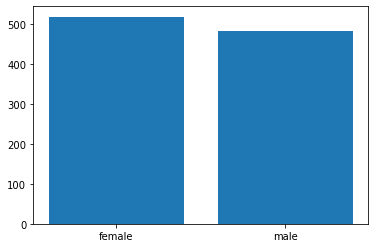

In [17]:
plt.bar(gender_freq.index, gender_freq['gender'])
plt.show()

## SEABORN _ BARPLOT 
Bisa di gunakan untuk menghitung mediannya dan lain lain

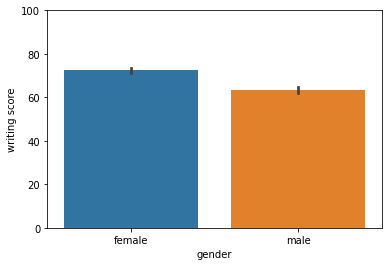

In [18]:
sns.barplot(x='gender', y='writing score', data=df)
plt.ylim(0,100)
plt.show()

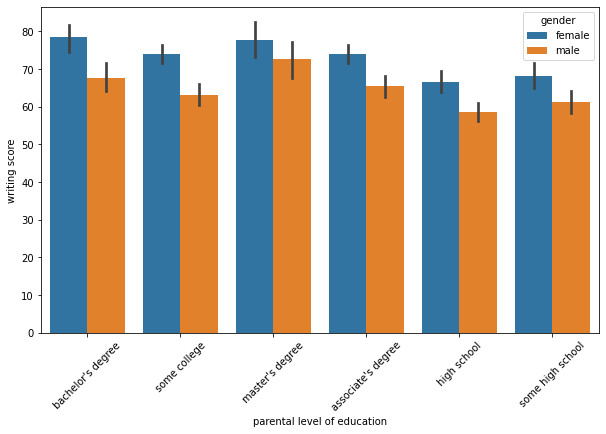

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='parental level of education', y='writing score', hue='gender', data=df)
plt.xticks(rotation=45)
plt.show()

## SEABORN_COUNTPLOT
cuma menghitung frekuensinya / banyak datanya

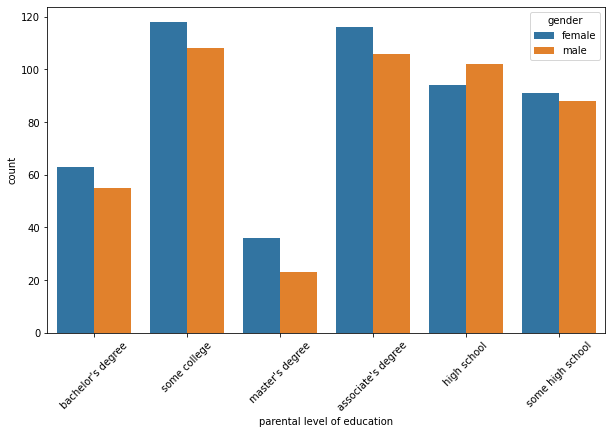

In [20]:
#untuk countplot x dan y tidak bisa di isi berbarengan, harus di isi salah satu
#x di isi dapet vertical plot
#y di isi dapet horizontal plot
plt.figure(figsize=(10,6))
sns.countplot(x='parental level of education', hue='gender', data=df)
plt.xticks(rotation=45)
plt.show()

In [21]:
#untuk level bisa di ganti dengan 1 atau 0
by_parental['gender'].value_counts(normalize=False).unstack(level=1)

NameError: name 'by_parental' is not defined

In [ ]:
by_parental = df.groupby('parental level of education')
by_parental['gender'].value_counts(normalize=True).unstack(level=1)

## SEABORN_FACETGRID

In [ ]:
sns.catplot(x='lunch', y='writing score', data=df, hue='gender', kind='bar')
plt.show()

In [ ]:
sns.catplot(x='lunch', y='writing score', data=df, kind='bar'
           , col='gender')
plt.show()

In [ ]:
sns.catplot(x='lunch', y='writing score', data=df, kind='bar'
           , col='gender', row='parental level of education')
plt.show()

In [ ]:
sns.catplot(x='lunch', y='writing score', data=df, hue='gender', kind='bar',
           order=['free/reduced','standard'], ci=None)
plt.show()

## POINTPLOT
dia menghitung agregesinya (mean dll)

In [ ]:
sns.catplot(x='lunch', y='writing score', data=df, hue='gender', kind='point',
           order=['free/reduced','standard'])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
g = sns.barplot(x='lunch', y='writing score', hue='gender',
           data=df, order=['free/reduced', 'standard'])
g.set_ylim(50.5, 80.5)

plt.subplot(122)
f = sns.pointplot(x='lunch', y='writing score', hue='gender',
           data=df, order=['free/reduced', 'standard'], join=False)
f.set_ylim(50.5, 80.5)

plt.show()

## PIE CHART

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
by_race = df.groupby('race/ethnicity').mean()
by_race

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [29]:
race_label = list(by_race.index)
race_label

['group A', 'group B', 'group C', 'group D', 'group E']

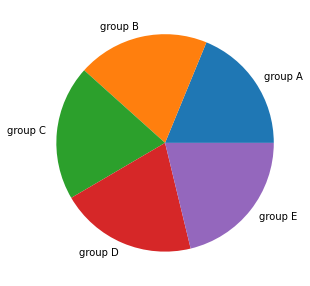

In [30]:
plt.figure(figsize=(10,5))
plt.pie(by_race['reading score'], labels=race_label)
plt.show()

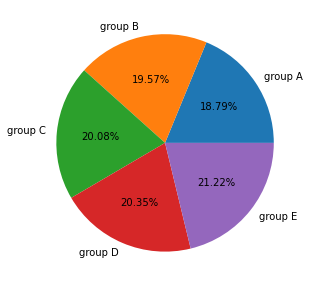

In [31]:
plt.figure(figsize=(10,5))
plt.pie(by_race['reading score'], labels=race_label, autopct='%.2f%%')
plt.show()

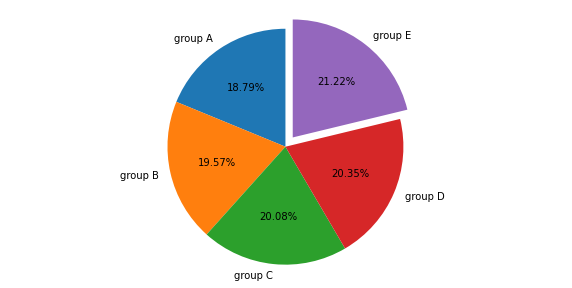

In [32]:
explode_list = [0,0,0,0,0.1]

plt.figure(figsize=(10,5))
plt.pie(by_race['reading score'], labels=race_label, autopct='%.2f%%',
       explode = explode_list,
       startangle = 90)
plt.axis('equal')
plt.show()